In [ ]:
#Importing some useful packages
import numpy as np #Numpy library provides various useful functions and operators for scientific computing
import cv2 #openCV is a key library that provides various useful functions for computer vision
import os #Honestly this one is a bit optional.
import glob #again just optional
from matplotlib import pyplot as plt

# Download images for Practical 4
!wget https://github.com/dsphamgithub/comp3007/raw/main/prac04/prac04.zip -O prac04.zip
!unzip prac04.zip

---
# Exercise 1 - SIFT Feature Extraction

In this exercise, we will delve into the properties of the **Scale-Invariant Feature Transform (SIFT)**, particularly its invariance characteristics.

## Steps:

1. **Keypoint Detection on Checkerboard Image**:
    - Use the SIFT algorithm to detect keypoints on a natural image.
    - Count the number of keypoints identified.
    - Visualize these keypoints using the `drawKeypoints` method.
    - **Observation**: Pay attention to the locations of the keypoints. How do they compare to the Harris corners from Practical 3? What can you infer about their main orientation?

2. **SIFT Descriptors**:
    - Extract SIFT descriptors for the detected keypoints.
    - Analyze the number of descriptors and the dimensionality of each.
    - Compare your findings with your lecture notes on SIFT. Are they consistent?
    - Convert the descriptors to an intensity image and inspect it.
    - **Observation**: Look for any discernible patterns in the intensity image. What do the descriptors convey?

3. **Invariance Test with Rotated and Scaled Image**:
    - Rotate (10 deg) and slightly scale (1.2) the input image.
    - Repeat the SIFT keypoint detection and descriptor extraction on this transformed image.
    - Convert the new set of descriptors to an intensity image.
    - **Observation**: Compare the intensity images of the original and transformed checkerboard. Can you validate the scale invariance of the SIFT descriptors?
    - Choose a few keypoint pairs from both images and delve deeper into their descriptors. What similarities or differences can you spot?
    - Extra: perform correspondence between the original image and its rotated and scaled version. Draw a line between any two matched keypoints in the two images.

## Objective:

Through this exercise, you'll gain hands-on experience with the SIFT algorithm, understanding its robustness against transformations and its ability to capture distinctive features in images. By comparing it with other methods like Harris corners, you'll appreciate the nuances and
---strengths of each approach.


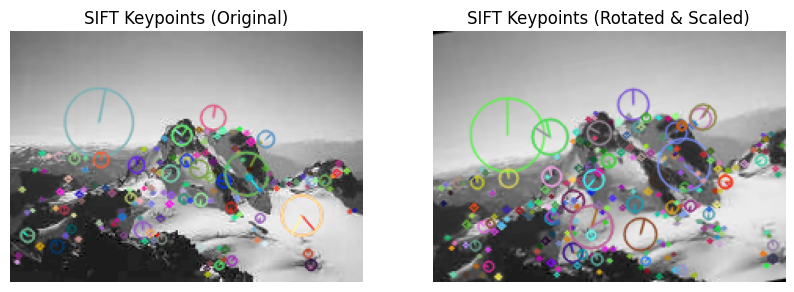

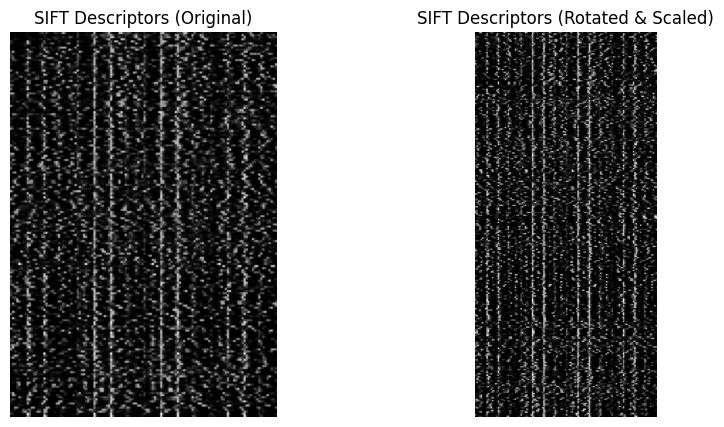

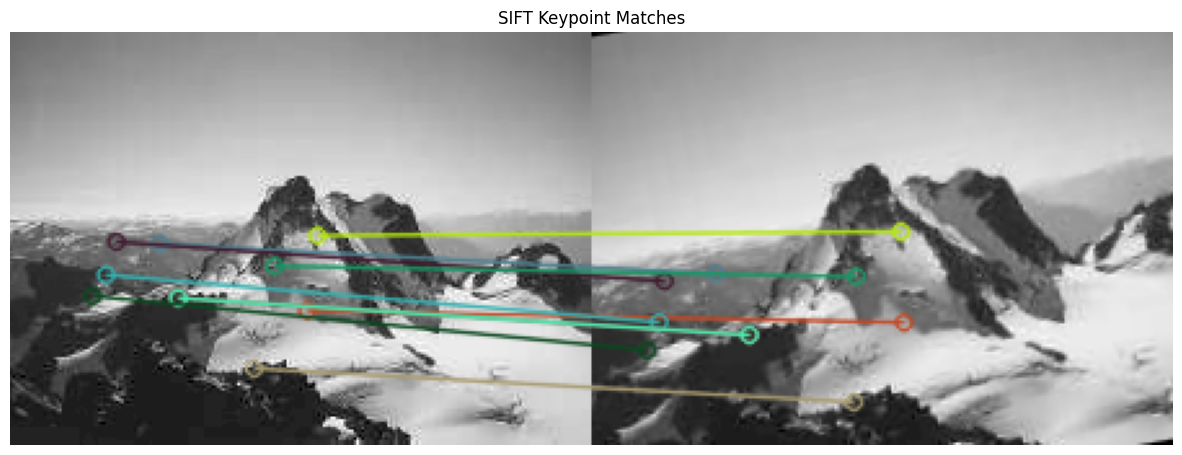

In [ ]:
# EXERCISE 1: SIFT feature detection and extraction

# Load the image
filename = "prac04ex01img01.png"
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector - complete this
sift =

# Detect SIFT keypoints and descriptors for the original image
keypoints, descriptors =

# Rotate and scale the image 10-degree rotation and 1.2x scaling - to complete
rows, cols = img.shape
M = cv2.getRotationMatrix2D
rotated_scaled_img = cv2.warpAffine

# Detect SIFT keypoints and descriptors for the rotated and scaled image
rotated_keypoints, rotated_descriptors =

# Draw keypoints on the original and rotated/scaled images
# Look up cv2.drawKeypoints
img_keypoints = cv2.drawKeypoints
rotated_img_keypoints = cv2.drawKeypoints

# Plot the original and rotated/scaled images side by side
plt.figure(figsize=(10, 5))


# Plot the descriptors side by side
plt.figure(figsize=(10, 5))

# Extra: Perform keypoint matching using BFMatcher
# Look up cv2.BFMatcher
bf =
matches =

# Sort matches by distance (best matches first)
matches =

# Draw the top 10 matches between the two images
# Look up cv2.drawMatches
img_matches =

# Display the matched keypoints
plt.figure(figsize=(15, 7))


---
# Exercise 2 - Binary Shape Analysis

### https://pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/
In this exercise, you'll be working with binary shape analysis to extract blob features from a gray-scale input image. The main goal is to separate individual characters from the image and then extract several binary features from them.

### Steps:

1. **Image Thresholding**:
    - Convert the input gray-scale image into a binary image.
    - Use Otsu's thresholding method (available in OpenCV) to achieve this.
    - Examine the resulting binary image to ensure the thresholding is effective.

2. **Connected Component Labeling (CCL)**:
    - Implement a CCL algorithm to separate the blobs, which in this context refers to the characters in the image.
    - Refer to lecture notes or documentation for guidance on implementing this algorithm.

3. **Blob Extraction**:
    - Apply the CCL algorithm to the binary image.
    - For each detected blob, identify the tightest bounding box.
    - Extract the character within each bounding box.
    - Verify the accuracy of the bounding boxes by either:
        - Saving individual characters as image files, or
        - Drawing the bounding boxes on the original image.

4. **Feature Computation**:
    For each extracted character, compute the following features:
    - **Area**: Total number of foreground pixels.
    - **Height**: Height of the bounding box.
    - **Width**: Width of the bounding box.
    - **Fraction of Foreground Pixels**: Calculated as $$ \frac{\text{Area}}{\text{Height} \times \text{Width}} $$
    - **Distribution in X-direction**: Analyze the spread of foreground pixels horizontally.
    - **Distribution in Y-direction**: Analyze the spread of foreground pixels vertically.

5. **Feature Analysis**:
    - Compare the features obtained for different pairs of characters.
    - Identify which features help in distinguishing different characters.
    - Determine which features consistently describe characters that appear the same.

By the end of this exercise, you should be able to effectively separate characters from an image and analyze their binary features to understand their distinct characteristics.

---


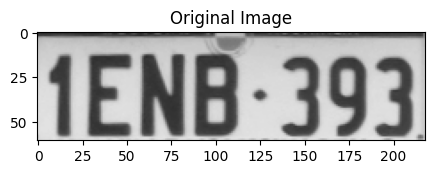

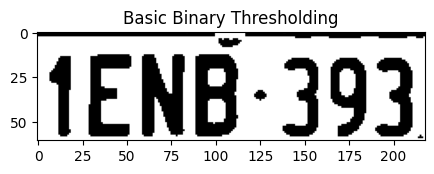

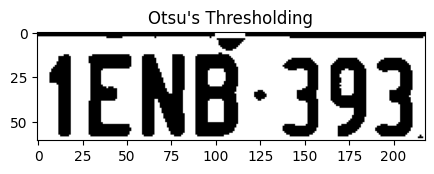

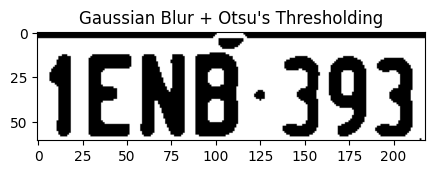

In [ ]:
# EXERCISE 2: BINARY IMAGE ANALYSIS

# Complete the following functions for the Exercise
# Function to display images using matplotlib
def display_image(img, title=""):

# Function to show connected components with different colors
def imshow_components(labels):
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0
    return labeled_img

# Function to extract features from each blob
def extract_features(labels_im, stats):
    features = []
    # write your code here
    return features

filename = "prac04ex02img01.png"
img = cv2.imread(filename, cv2.IMREAD_COLOR)
display_image(img, "Original Image")

# Convert to gray and Gaussian blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding: basic, Otsu's, and Gaussian Blur+Otsu's
_, th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

display_image(th1, "Basic Binary Thresholding")
display_image(th2, "Otsu's Thresholding")
display_image(th3, "Gaussian Blur + Otsu's Thresholding")

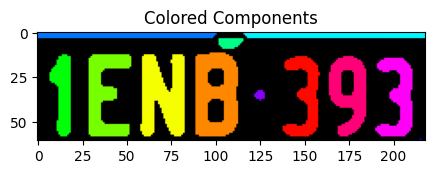

Features for Blob 1:
Area: 401
Height: 4
Width: 101
Fraction of Foreground Pixels: 0.9925742574257426

Features for Blob 2:
Area: 405
Height: 4
Width: 102
Fraction of Foreground Pixels: 0.9926470588235294

Difference in Area between Blob 1 and Blob 2: -4


In [ ]:
# EXERCISE 2 - Continued

# Invert the image for connected component analysis
th =

# Connected component analysis
# Implement your own or use cv2.connectedComponentsWithStats
num_labels, labels_im, stats, centroids =

# Display the components
colored_components_img =
display_image(colored_components_img, "Colored Components")

# Extract features for each blob
blob_features =

# Compare features of the first two blobs
blob1_features =
blob2_features =

# Complete the code
print("Features for Blob 1:")

# Complete the code
print("\nFeatures for Blob 2:")

# Demonstrate comparison using the Area feature
difference_in_area = blob1_features["Area"] - blob2_features["Area"]
print(f"\nDifference in Area between Blob 1 and Blob 2: {difference_in_area}")


___
# Exercise 3 - Histogram Feature Extraction

### Objective:
Develop a program to compute the histogram of a given input gray-scale image patch. Utilize this program to analyze the characters segmented in Exercise 2

### Steps:

1. **Histogram Computation**:
    - Write a function or program that calculates the histogram of an input gray-scale image patch.
    - Decide on the number of bins for the histogram. This choice will affect the resolution and the details captured by the histogram.

2. **Application on Exercise 2**:
    - Revisit the results from Exercise 2 where individual characters were segmented using bounding boxes.
    - For each segmented character, compute its histogram using the program developed in the first step.

3. **Analysis**:
    - Compare the histograms of different characters. Observe the differences and similarities.
    - Compare the histograms of characters that are identical. Note the variations, if any, and the consistencies.
    - Discuss the effectiveness of the histogram as a feature for character differentiation.

4. **Resolution Dependency**:
    - Analyze how the histogram feature's effectiveness changes with the resolution (i.e., the number of bins).
    - Does increasing the number of bins provide more discriminative power, or does it introduce noise? Conversely, does reducing the number of bins oversiplify the feature?

### Deliverables:
- A program or function for histogram computation.
- Histograms of segmented characters from Exercise 2.
- Analysis and comments on the utility of the histogram feature for character differentiation and its dependency on resolution.


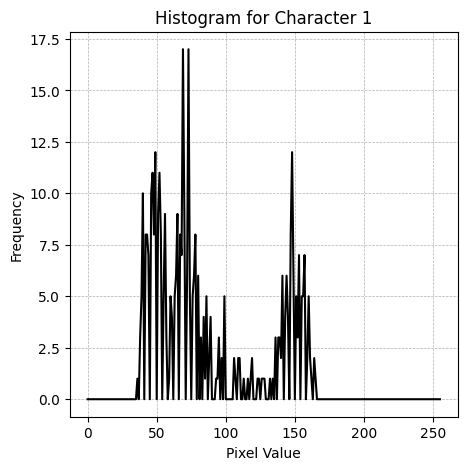

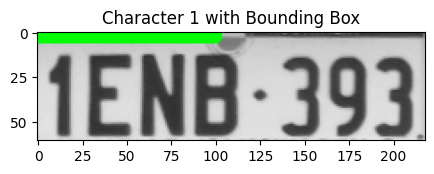

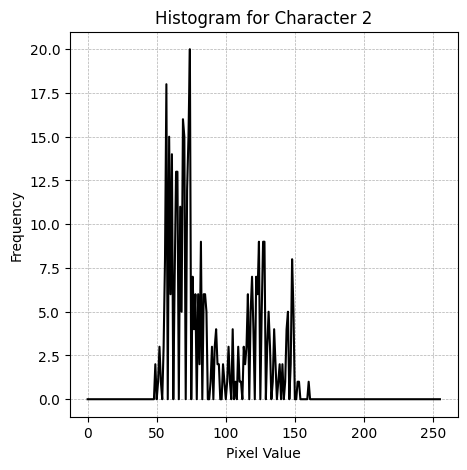

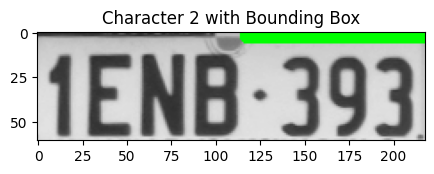

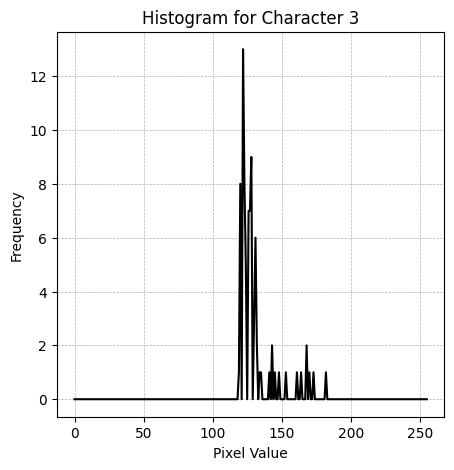

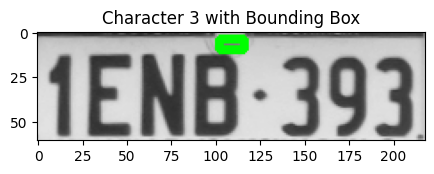

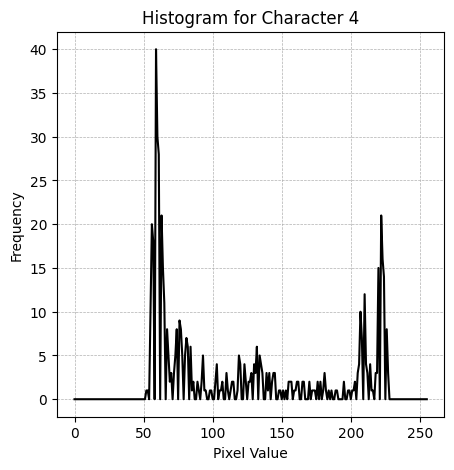

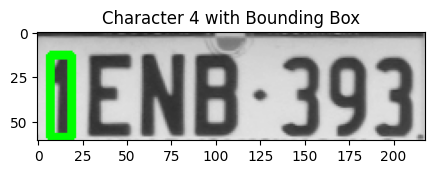

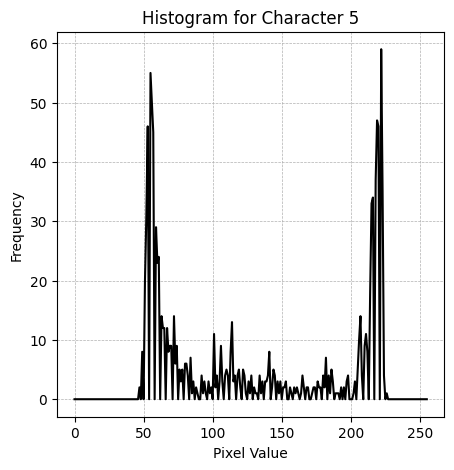

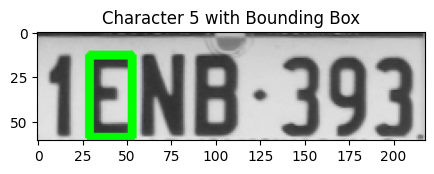

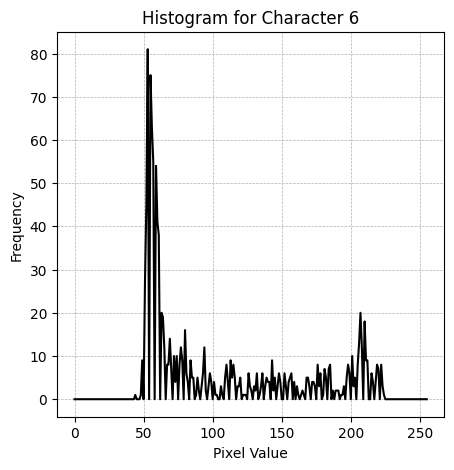

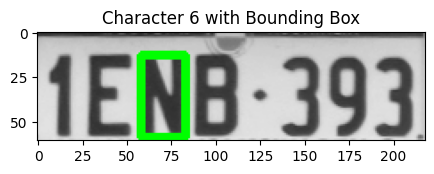

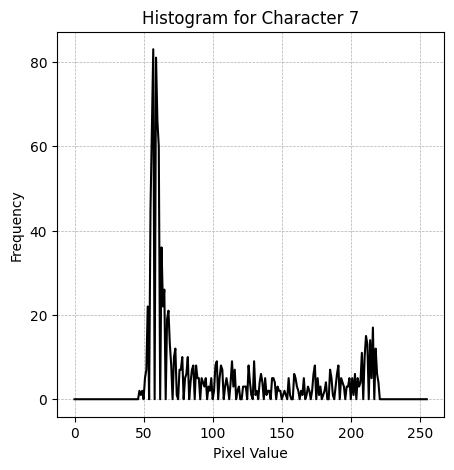

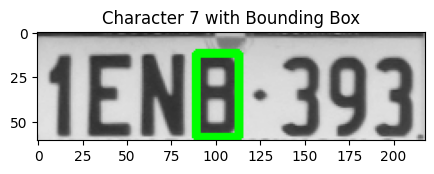

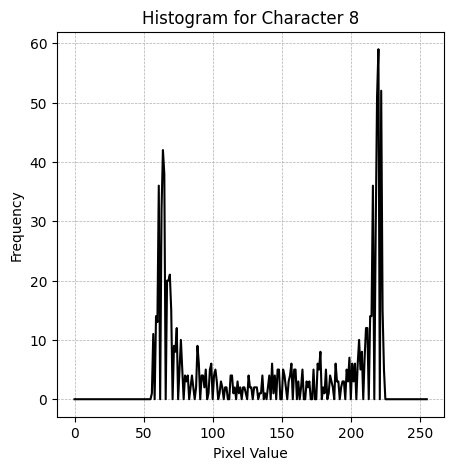

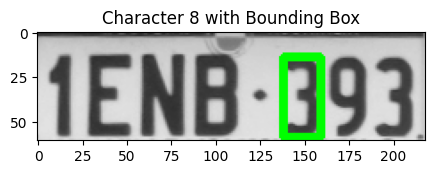

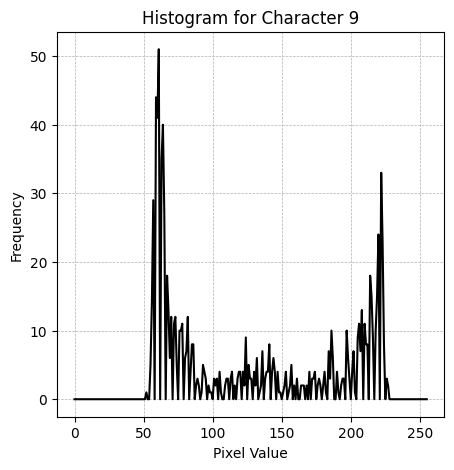

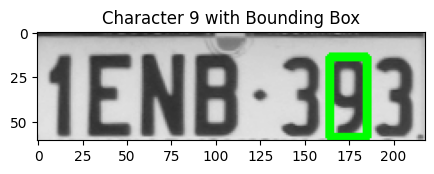

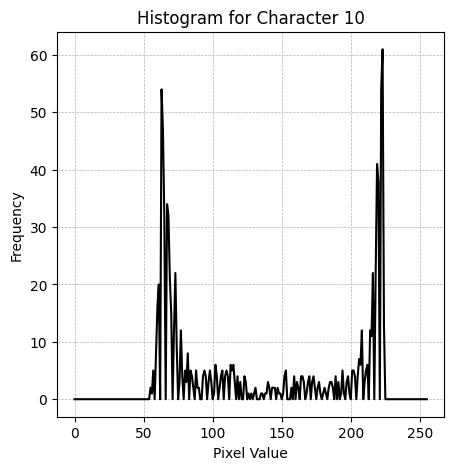

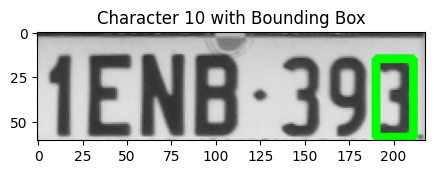

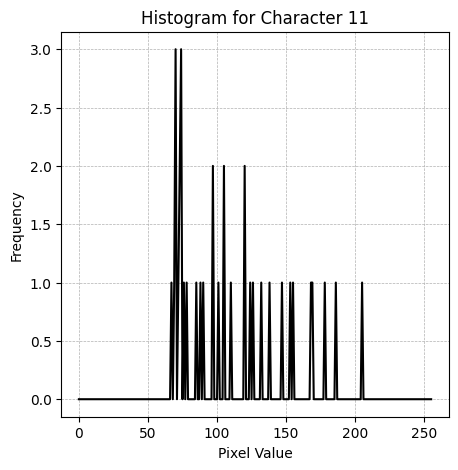

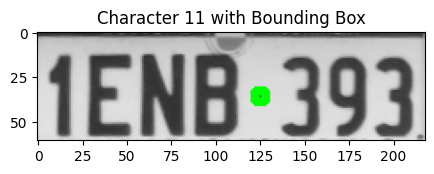

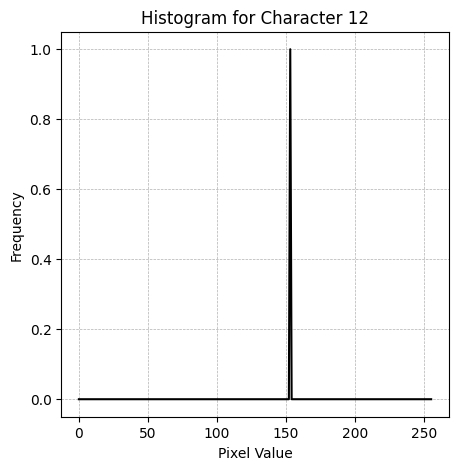

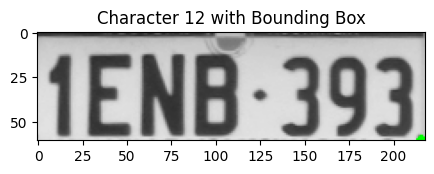

In [ ]:
# EXERCISE 3 HISTOGRAM

# Function to compute histogram - to complete
def compute_histogram(image, bins=256):

    return hist

# Function to display histogram - to complete
def display_histogram(hist, title="Histogram"):


# Function to display images using matplotlib - to complete
def display_image(img, title=""):

# Assuming you have already performed connected component analysis as above

# Extract bounding boxes and compute histograms
for k in range(1, num_labels):  # Start from 1 to exclude the background


